# GMIT - Fundamentals of Data Analysis
## <font color='purple'>**Assessment 2019: Tips dataset Analysis**</font>

![Image](https://www.tripsavvy.com/thmb/aXTGXSsrJi9QYh3RPCzNfLhu63E=/950x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/GettyImages-184868831-5c352fd746e0fb00017c4bc7.jpg)

### __Table of Contents:__
   [1.&emsp;Dataset Overview](#dataset)<br>
   [2.&emsp;Descriptive Statistics](#descriptive)<br>
   &emsp;&emsp;[-&emsp;Qualitative Data](#qualitative)<br>
   &emsp;&emsp;[-&emsp;Quantitative Data](#quantitative)<br>
   [3.&emsp;Outliers](#outliers)<br>
   &emsp;&emsp;[-&emsp;name here](#name_here)<br>
   [4.&emsp;Regression](#regression)<br>
   &emsp;&emsp;[-&emsp;Correliation](#correlation)<br>
   &emsp;&emsp;[-&emsp;Linear Regression](#linear)<br>
   &emsp;&emsp;[-&emsp;Sclearn](#sclearn)<br>
   [5.&emsp;Analysis](#analysis)<br>
   &emsp;&emsp;[-&emsp;Name_here](#name_here)<br>
   [6.&emsp;References](#ref)<br>

<a id="dataset"></a>

### **About Tips dataset**
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. 

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. 

**Each record includes:**
-	Total bill - Total bill (cost of the meal), including tax, in US dollars
-	Tip - Tip (gratuity) in US dollars
-	Sex - Sex of person paying for the meal (male/female)
-	Smoker - Smoker in party? (No/Yes)
-	Day - Thursday, Friday, Saturday or Sunday
-	Time - Day or Night
-	Size - Size of the party

In [24]:
# Importing the libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import seaborn as sns
import sklearn.neighbors as nei
import sklearn.model_selection as mod
sns.set(color_codes=True)

In [11]:
# Importing the tips dataset from the local file
df = pd.read_csv("Tips.csv")
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

<a id="descriptive"></a>

### **<font color='purple'>Descriptive statistics</font>**

<a id="qualitative"></a>

#### **Qualitative Data**

The Tips dataset includes the following Qualitative data:
- Sex
- Smoker
- Day
- Time

Let's check how the qualitative data are distributed in our sample dataset. In the graphs below we are checking if our dataset has equal amount of Female vs Male, Non-smokers vs Smokers, how many Lunches vs Dinners were recorded and if we had the same amount of records done every  day within 4 days (from Thursday to Sunday).

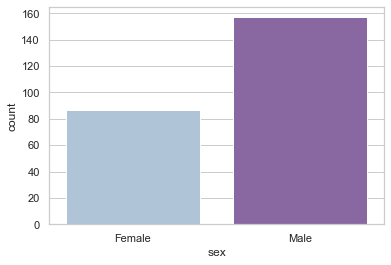

In [48]:
sns.set_style("whitegrid")
sns.countplot( x="sex", data=df, palette="BuPu")

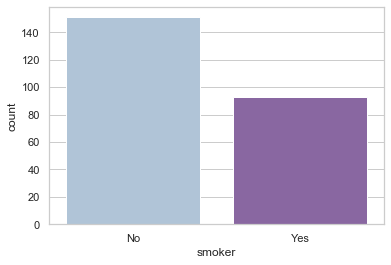

In [49]:
sns.countplot(x="smoker", data=df, palette="BuPu")

As we can see from the graphs above, our sample contains more Males than Females as well as more Non-smokers rathen than smokers.

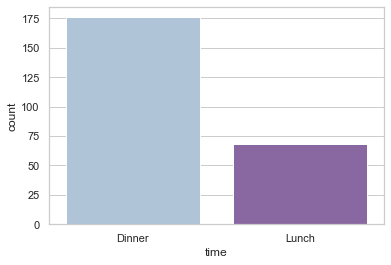

In [50]:
sns.countplot(x="time", data=df, palette="BuPu")

This chart shows that number of time DIneers and Lunches is not equal in our sample as well. The datasat contains more records for Dinner rather than Lunch.

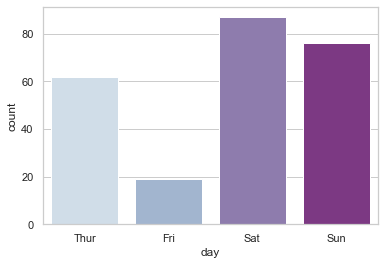

In [51]:
order = ["Thur", "Fri", "Sat", "Sun"]
sns.countplot(x="day", data=df, palette="BuPu",order=order)

The bar chart above shows that the most data was collected during Saturday and Sunday, the least - on Friday.

<a id="quantitative"></a>

#### **Quantitative Data**

The Tips dataset includes the following Quantitative data:
- total bill
- tip
- size of the party

##### **Basic statistics with _.descibe()_**

_.describe()_ is used to see a number of basic statistics about the column, such as the mean, min, max, and standard deviation. This can give you a quick overview of the shape of the data.

Let's apply this function to a particular column of our dataset - Total bill:

In [8]:
df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

Here's a quick breakdown of the above as it relates to this particular dataset:

- _**count**:_ there are 244 rows in the dataset.
- _**mean**:_ the average bill.
- _**std**:_ the standard deviation. Standard Deviation tells how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out. In our case the measurememnts of a total bill are spread of 8.9 to the left and to the right from the average bill (mean). 
- _**min**:_ the smallest bill in the dataset = 3.07 USD
- _**25%**:_ the 25th percentile. 25% of all bills are lower than 13.35 USD.
- _**50%**:_ the 50th percentile, or the median. 50% of bills are lower than 13.80 USD.
- _**75%**:_ the 75th percentile. 75% of bills are lower than 24.13 USD.
- _**max**:_ the highest bill = 50.81 USD.

Also we can visually represent the distribution of the total bills using a **histogram**.

Histogram shows frequency distribution for a particular column in a dataset. For instance, if we want to see how many times the amount of total_bill is between 10-20, 20-30, 30-40 and so on, we can use a histogram.

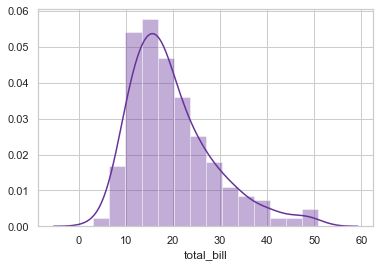

In [53]:
sns.set_style("whitegrid")
sns.distplot(df['total_bill'], color="rebeccapurple")

From this histogram we can see that the most of the bills fall into area betweem 10 and 20 USD.

If we check the value of the median and mean, we'll notice that the median is less than the mean. This explains the right skewness of the histogram.

Now let's look at the Tip distribution:

In [9]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

As we can see the average tip is equal to 3 USD and standard deviation is 1.38. We have a _**small standard deviation**_. The small (low) standard deviation indicates that the values tend to be close to the mean of the set, while a _**high standard deviation**_ indicates that the values are spread out over a wider range.

The smallest tip is equal to 1 USD, and the highest - 10 USD. Median is 2.9 USD.

Let's look at the histogram of the tip distribution:

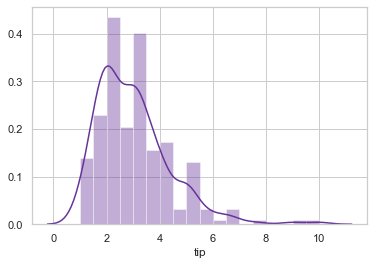

In [54]:
sns.distplot(df['tip'], color="rebeccapurple")

The median is smaller then the mean value, therefore our histogram is skewed right as well.

<a id="outliers"></a>

#### **Outliers**

In statistics, an _**outlier**_ is an observation point that is distant from other observations.
The above definition suggests that outlier is something which is separate/different from the population/sample.

There are few visualization tools to discover outliers:
- Box plot
- Scatter plot
- Z-Score
- IQR score


**Box plot**

According to the Wikipedia  a _**box plot**_ is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes. Let’s try and see it ourselves.

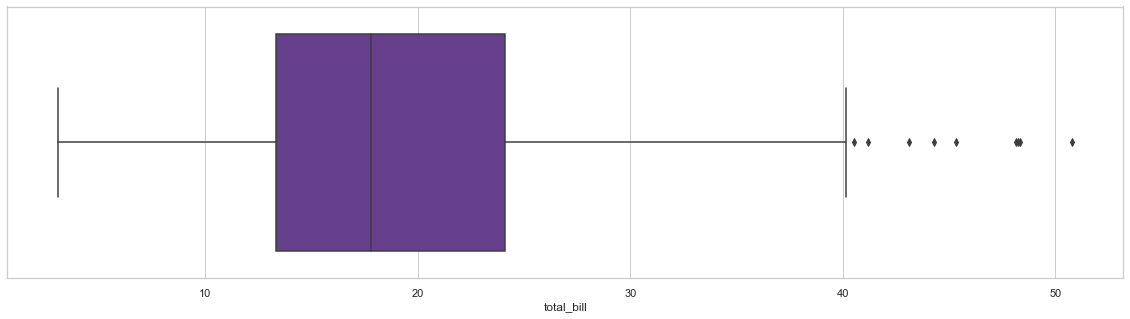

In [55]:
plt.figure(figsize=(20,5))

sns.boxplot(df['total_bill'], color="rebeccapurple")

Let's get the values of the Oultiers:

In [31]:
from matplotlib.cbook import boxplot_stats

sorted_array = np.sort(boxplot_stats(df['total_bill']).pop(0)['fliers'])
print(sorted_array)

[40.55 41.19 43.11 44.3  45.35 48.17 48.27 48.33 50.81]


As we can see from the box plot all bills, that are higher than 40 USD have been marked as outliers. In our case the box plot highlighted 9 Outliers.

**Scatter plot**

A _**scatter plot**_ is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

The scatter plot is the collection of points that shows values for two variables. We can try and draw scatter plot for two variables (total bill and tips) from our Tips dataset.

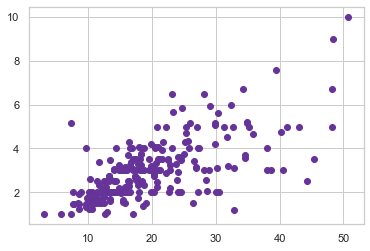

In [69]:
plt.scatter(df['total_bill'], df['tip'], color="rebeccapurple")

Looking at the plot above, we can see that most of data points are lying bottom left side but there are points which are far from the population like top right corner. These are potential outliers.

**Z-score**

The _**Z-score**_ is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. Any z-score greater than 3 or less than -3 is considered to be an outlier. This rule of thumb is based on the empirical rule. From this rule we see that almost all of the data (99.7%) should be within three standard deviations from the mean. However if the thershold is less than -2 or greater than 2, we might identify the possible outliers. From this rule we see that almost all of the data (95%) should be within two standard deviations from the mean.

In [23]:
z = np.abs(stats.zscore(df['total_bill']))
print(z)

[3.14711305e-01 1.06323531e+00 1.37779900e-01 4.38315103e-01
 5.40744704e-01 6.19536705e-01 1.23995452e+00 7.98507107e-01
 5.34203307e-01 5.63468908e-01 1.07111451e+00 1.74175992e+00
 4.91430507e-01 1.52624903e-01 5.57840908e-01 2.01939101e-01
 1.06436091e+00 3.93503306e-01 3.16962505e-01 9.72582994e-02
 2.10030504e-01 5.67366990e-02 4.52034507e-01 2.21000952e+00
 3.83349840e-03 2.22412104e-01 7.22178510e-01 7.98719310e-01
 2.15446301e-01 1.53017018e-02 1.15215771e+00 1.61629703e-01
 5.31952107e-01 1.01760699e-01 2.25788904e-01 4.81087904e-01
 3.91252106e-01 3.21464905e-01 1.23359303e-01 1.29264551e+00
 4.21643306e-01 2.61808105e-01 6.58019309e-01 1.13752491e+00
 1.19471831e+00 1.68383303e-01 2.75103101e-01 1.41983831e+00
 9.86482309e-01 1.96523304e-01 8.15603311e-01 1.06886331e+00
 1.69110792e+00 1.10825931e+00 6.49927905e-01 3.33113020e-02
 2.05129992e+00 7.45603907e-01 9.61931312e-01 3.20616553e+00
 5.67366990e-02 6.72652109e-01 9.86694512e-01 1.68383303e-01
 2.47175304e-01 3.309909

Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [32]:
# treshhold = 3
print(np.where(z > 3))

(array([ 59, 156, 170, 212], dtype=int64),)


The output contains the list of row numbers. Let's look for a total bill values for these rows:

In [41]:
print(df['total_bill'][[59, 156, 170, 212]])

59     48.27
156    48.17
170    50.81
212    48.33
Name: total_bill, dtype: float64


When we were detecting outliers using Box plotting we got 9 Outliers, however in Z-score we got only 4? Why there is a difference? Using Z-score methong we identified the outliers using the treshhold |3|, but we didn't capture the potential outliers. Now we reduce the threshold value to |2| and see if there are any potential outliers:

In [24]:
# treshhold = 2
print(np.where(z > 2))

(array([ 23,  56,  59,  95, 102, 112, 142, 156, 170, 182, 184, 197, 207,
       212], dtype=int64),)


As you can see from the output array includes the actual outliers we got when the threshold was greater than 3. But we can see some new records there. Le'ts check the total bill values for them:

In [25]:
print(df['total_bill'][[23, 56, 95, 102, 112, 142, 182, 184, 197, 207]])

23     39.42
56     38.01
95     40.17
102    44.30
112    38.07
142    41.19
182    45.35
184    40.55
197    43.11
207    38.73
Name: total_bill, dtype: float64


These potential outliers falling into 4.7% group (99.7% - 95%), between two and three standard deviations.

**IQR score**

The _**interquartile range (IQR)**_, also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers. IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR:

In [6]:
# as an example, we are calculating IQE for total bill

Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)

10.779999999999998


As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [18]:
Outlier = (df['total_bill'] < (Q1 - 1.5 * IQR))|(df['total_bill']> (Q3 + 1.5 * IQR))
[i for i, x in enumerate(Outlier) if x]

[59, 102, 142, 156, 170, 182, 184, 197, 212]

In [32]:
print(df['total_bill'][[59, 102, 142, 156, 170, 182, 184, 197, 212]])

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64


We got 9 Outliers - the same as using the box plot. These 9 records were highlighted as potential outliers using Z-score method as well.


 
**Summary**: 
We have tested three different methods to identify the outliers:

| Box plot    |Z-score: Potential |Z-score: Actual|   IQR   |
|-------------|-------------------|---------------|---------|
|             |        38.01      |               |         |
|             |        38.07      |               |         |
|             |        38.73      |               |         |
|             |        39.42      |               |         |
|             |        40.17      |               |         |
|**40.55**    |      **40.55**    |               |**40.55**|
|**41.19**    |      **41.19**    |               |**41.19**|
|**43.11**    |      **43.11**    |               |**43.11**|
|**44.30**    |      **44.30**    |               |**44.30**|
|**45.35**    |      **45.35**    |               |**45.35**|
|**48.17**    |                   |   **48.17**   |**48.17**|
|**48.27**    |                   |   **48.27**   |**48.27**|
|**48.33**    |                   |   **48.33**   |**48.33**|
|**50.81**    |                   |   **50.81**   |**50.81**|


_**Note**_: the values in bold were identified as Outliers using all three methods.

<a id="regression"></a>

### **<font color='purple'>Regression</font>**

<a id="correlation"></a>

#### **Correlation**

_**Correlation**_ in statistical terms is used to denote association between two quantitative variables. It's assumed that the association is linear, that one variable increases or decreases a fixed amount for a unit increase or decrease in the other. The other technique that is often used in these circumstances is regression, which involves estimating the best straight line to summarise the association.

The degree of association is measured by a _**correlation coefficient**_, denoted by r. It is sometimes called Pearson's correlation coefficient after its originator and is a measure of linear association. If a curved line is needed to express the relationship, other and more complicated measures of the correlation must be used.

The correlation coefficient is measured on a scale that varies from + 1 through 0 to - 1. Complete correlation between two variables is expressed by either + 1 or -1. When one variable increases as the other increases the correlation is positive; when one decreases as the other increases it is negative. Complete absence of correlation is represented by 0. 

Let's test if there is any correlation between our total bill and tip values:

Text(0, 0.5, 'Tips')

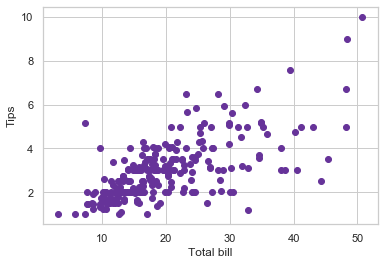

In [71]:
plt.scatter(df['total_bill'], df['tip'], color="rebeccapurple")
plt.xlabel("Total bill")
plt.ylabel("Tips")

As we can see from the scatter plot above, there is a weak linear relationship betweentwo variables: total bill and tips.

Correlation describes the strength of an association between two variables, and is completely symmetrical, the correlation between A and B is the same as the correlation between B and A. However, if the two variables are related it means that when one changes by a certain amount the other changes on an average by a certain amount. The relationship can be represented by a simple equation called the regression equation. In this context "regression" (the term is a historical anomaly) simply means that the average value of y is a "function" of x, that is, it changes with x. 

The regression equation representing how much y changes with any given change of x can be used to construct a regression line on a scatter diagram, and in the simplest case this is assumed to be a straight line. The direction in which the line slopes depends on whether the correlation is positive or negative. When the two sets of observations increase or decrease together (positive) the line slopes upwards from left to right; when one set decreases as the other increases the line slopes downwards from left to right. 

<a id="linear"></a>

#### **Linear Regression**

Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. 

_**Linear regression**_ is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

Linear regression is an approach to modelling the linear relationship between a target variable, also referred to as the dependent variable, and one or more explanatory variables, known as independent variables. The case of one explanatory variable is called simple linear regression. 

For more than one explanatory variable, the process is called multiple linear regression. Most applications of linear regression fall into one of the following two broad categories:
- prediction/forecasting
- explanation of variation in target

Linear regression can be used to fit a predictive model to an observed set of data values of the target and explanatory variables. After developing the model, when additional values of the explanatory variables are collected without an accompanying target value, then the model can be used to make a prediction of the target values.

Secondly, linear regression analysis can be applied to quantify the strength of the relationship between the targets and the explanatory variables. It can be used to determine if some 
explanatory variables have no linear relationship with the target variable. Linear regression models are often fitted using the least squares approach, although they may also be fitted in other ways.

##### **Assumptions of Linear Regression**

Building a linear regression model is only half of the work. In order to actually be usable in practice, the model should conform to the assumptions of linear regression.

- Assumption 1: The regression model is linear in parameters
- Assumption 2: No or low multicollinearity
- Assumption 3: Homoscedasticity of residuals or equal variance
- Assumption 4: No autocorrelation of residuals

**_Assumption 1_** can be tested with scatter plot, As we can see from the plot below. there is a linear positive correlation betwee two variables: total bill and tips.

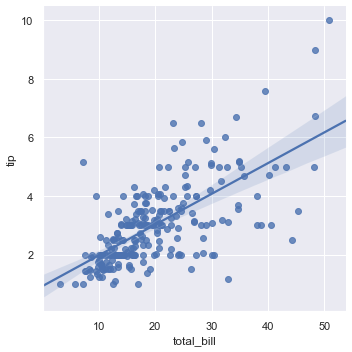

In [8]:
sns.lmplot(x="total_bill", y="tip", data=df)

This linear line across our plot is the best available fit for the trend of the tip usually customers give with respect to the total bill that gets generated. And the data points that we see at extreme top right which are far away from this line are known as outliers in the dataset. We may think of outliers as exceptions.

_**The line of best fit**_ is the line that describes the relationship between the two variables, where the sum of the squares of the residual errors between the individual data values and the line is at its minimum. Therefore, it is the best possible straight line that fits the data. 

As you can notice, there is a shadow converging at the center where there is a chunk of our data. This convergent point is actually _**the statistical mean**_ or in simpler words, the generalized prediction of tip value in this restaurant on a daily basis.

**_Assumption 2_** - Multicollinearity occurs when the explanatory variables are highly correlated with each other.
Multicollinearity may be analyzed in a variety of ways. For example:
- _**Correlation matrix**_ – compute the matrix of Pearson’s correlation coefficients for each explanatory variable. Correlation values range between -1 and 1.
- _**Tolerance**_ – the tolerance (T) measures the influence of one explanatory variable on all the other independent variables. It is calculated by regressing the explanatory variable of interest onto the remaining explanatory variables included in the regression analysis. Then the tolerance is used to calculate the “variance inflation factor”. 

If multicollinearity is found in the data the simplest way to address the problem is to remove one of the correlated variables.

We are going to check the evidence of Multicollinearity using a correlation heatmap:

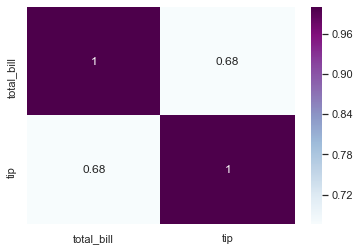

In [99]:
corr = df[["total_bill","tip"]].corr(method='pearson')
sns.heatmap(corr, cmap="BuPu", annot=True)

For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. In our case the correlation coefficient value is 0.68, therefore we can exclude the multicollinearity.

We can use numerical values such as the Pearson correlation coefficient or visualization tools such as the scatter plot to evaluate whether or not linear regression is appropriate to predict the data. 

Another way to perform this evaluation is by using residual plots. _**Residual plots**_ show the difference between actual and predicted values. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Text(0.5, 0, 'Predicted tips (Fitted values)')

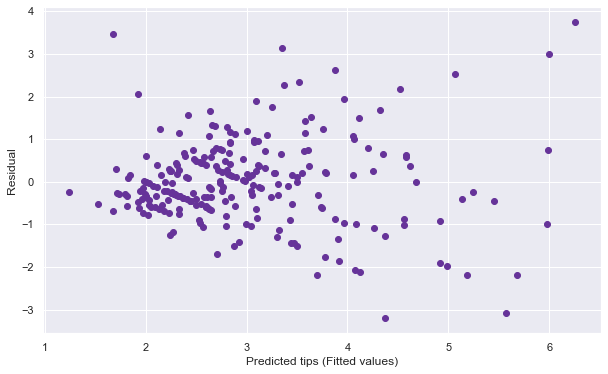

In [6]:
# Run regression:
reg = smf.ols('tip ~ total_bill', data=df).fit()

# Calculating residuals:
pred_val = reg.fittedvalues.copy()
true_val = df['tip'].values.copy()
residual = true_val - pred_val

# Plotting Residual vs Predicted value
fig = plt.figure(figsize=(10,6))
plt.scatter(pred_val, residual, color="rebeccapurple")
plt.ylabel('Residual')
plt.xlabel('Predicted tips (Fitted values)')

# Incorrect statement - needs to be fixed:

As we can see, the points are randomly distributed around 0, meaning linear regression is an appropriate model to predict our data. If the residual plot presents a curvature, the linear assumption is incorrect. In this case, a non-linear function will be more suitable to predict the data.

**_Assumption 3_** - Linear regression analysis requires that there is little or no “autocorrelation” in the residuals. This means that the error terms must be uncorrelated so that one observation of the error term should not predict the next observation.

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.79842795, 0.79613309, 0.78979279, 0.79630833, 0.78950126,
        0.81819032, 0.82324487, 0.82349452, 0.83535438, 0.83999812,
        1.        , 0.83999812, 0.83535438, 0.82349452, 0.82324487,
        0.81819032, 0.78950126, 0.79630833, 0.78979279, 0.79613309,
        0.79842795]),
 <matplotlib.lines.Line2D at 0x18ba1fc5828>)

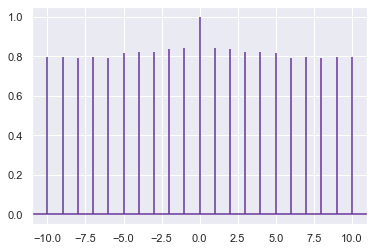

In [27]:
# Checking if there is an autocorrelation in the total bill array
plt.acorr(df["total_bill"], color="rebeccapurple")

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.79491763, 0.79900806, 0.81459117, 0.80021636, 0.79817201,
        0.81719113, 0.79807557, 0.82232271, 0.8416129 , 0.82917758,
        1.        , 0.82917758, 0.8416129 , 0.82232271, 0.79807557,
        0.81719113, 0.79817201, 0.80021636, 0.81459117, 0.79900806,
        0.79491763]),
 <matplotlib.lines.Line2D at 0x18ba20297b8>)

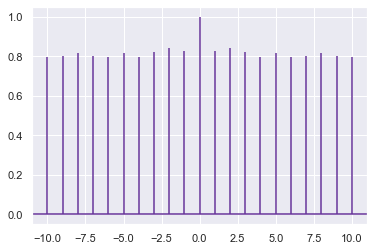

In [28]:
# Checking if there is an autocorrelation in the tip array
plt.acorr(df["tip"], color="rebeccapurple")

As we can see from the two plots above, there is no autocorrelation in the residuals.

**_Assumption 4_** 

The variance of the errors should be consistent for all observations. This means that the variance does not change for each observation or for a range of observations. 
The scatter plot is good way to check whether the data is _**homoscedastic**_ (which simply means that the residuals are equal across the regression line).

The assumption of  _**homoscedasticity**_ is a vital assumption for linear regression. If this assumption is violated, then the standard errors will be biased. The standard errors are used to conduct significance tests, and calculate the confidence intervals.

This can be tested using a few different statistical tests, these include the
Brown-Forsythe test, Levene’s test, Bruesch-Pagan test, White test or Cook-Weisberg test. In this example, I will use one of the most common test to check homoscedasticity - Bruesch-Pagan test:
demonstrate how to conduct the Bruesch-Pagan test followed by how to conduct the Levene’s test. The test for homoscedasticity of variance needs to be conducted for each level of the categorical variables.

In [31]:
name = ['LM statistic', 'LM-Test p-value', 'F-statistics', 'F-test p-value']
test = smd.het_breuschpagan(residual, df[['total_bill', 'tip']])
lzip(name, test)

[('LM statistic', 86.73330953041769),
 ('LM-Test p-value', 1.2418745637053014e-20),
 ('F-statistics', 66.7320614546179),
 ('F-test p-value', 8.29616666191201e-24)]

Heteroskedasticity is indicated if p value < 0.05, so according to this test, this model is heteroscedastic.

<a id="sclearn"></a>

**Sclearn** 

In [97]:
inputs = df[['total_bill', 'size', 'tip']]
outputs = df['sex']

Building K nearest neighbors algoritm (in our case it's 5 nearest neighbors)

In [98]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

Training the classifier on our dataset

In [99]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predict:

In [100]:
df.loc[0]

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

In [84]:
#providing random values to check prediction
knn.predict([[24.59, 4, 3.61]])

array(['Female'], dtype=object)

Evaluate:

In [101]:
#knn.predict(inputs)

In [102]:
#knn.predict(inputs) == outputs

In [103]:
#calculates how many correct predictions are in the array for given input:
(knn.predict(inputs) == outputs).sum()

175

In [104]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

In [92]:
#outputs_test

In [105]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [106]:
knn.predict(inputs_test)

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male'], dtype=object)

In [107]:
(knn.predict(inputs_test) == outputs_test).sum()

30

<a id="analysis"></a>

### **<font color='purple'>Analysis</font>**

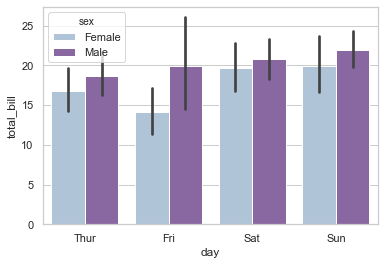

In [57]:
sns.barplot(x="day", y="total_bill", hue="sex", data=df, palette="BuPu", order=order)

The following script plots box plots for total bill per weekday where the bill is paid by a smoker or Non-smoker.

In [25]:
sns.catplot(x="day", y="total_bill", hue="smoker", data=df, palette="BuPu", kind="box", order=order)

NameError: name 'order' is not defined

You can see that on Friday, Saturday and Sunday, smokers paid more bills than non-smokers. Furthermore, the average bill paid on Friday by smokers is significantly lower, compared to the average bill paid by non-smokers. On Thursday the average bill is almost the same for both categories, with a slight rise on Saturday for smokers. The biggest difference between average bills payed by smokers and non-smokers was on Sunday.

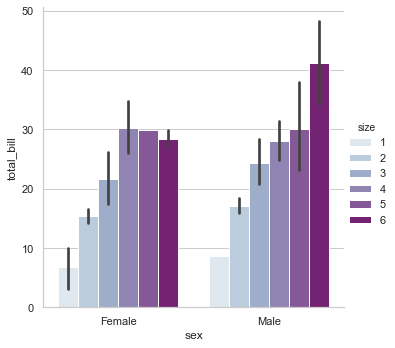

In [59]:
sns.catplot(x="sex", y="total_bill", hue="size", kind="bar", data=df, palette="BuPu")

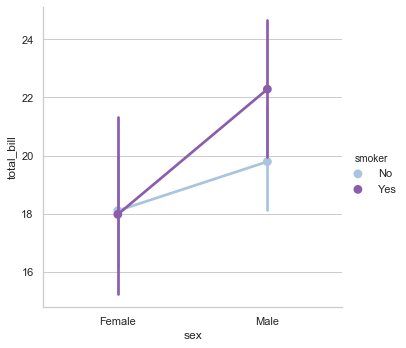

In [60]:
sns.catplot(x="sex", y="total_bill", hue="smoker", kind="point", data=df, palette="BuPu")

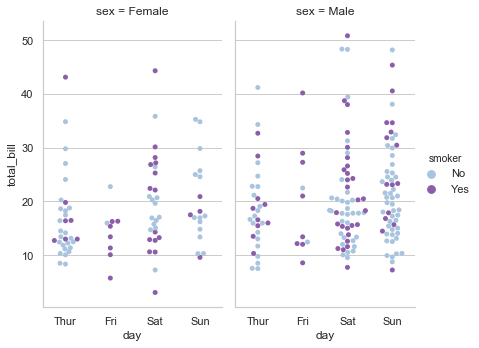

In [61]:
sns.catplot(x="day", y="total_bill", hue="smoker", col="sex", aspect=.6, kind="swarm", data=df, order=order, palette="BuPu")

The pair plot is a graph that plots the relationship between all the numeric columns in the form of multiple scatter plots. Along the diagonals, the histogram of the columns is displayed. 

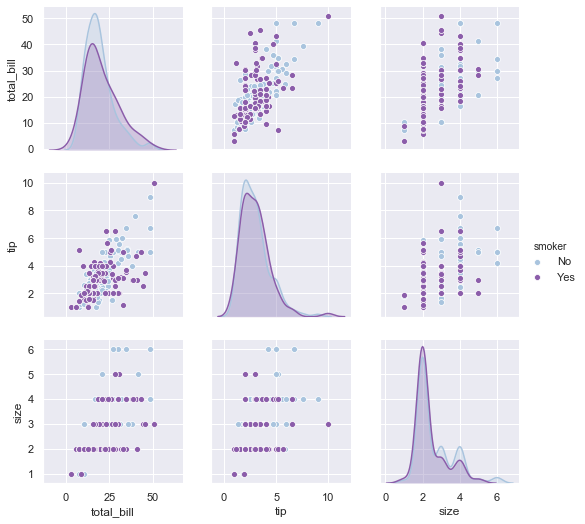

In [51]:
sns.pairplot(df, hue='smoker', palette="BuPu")

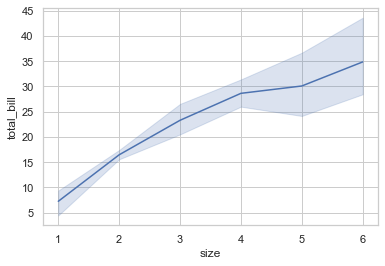

In [63]:
sns.lineplot(x="size", y="total_bill", data=df, palette="BuPu")

A heat map is a matrix-like plot used to plot the degree of correlation between multiple numerical columns. 

The heatmap() function accepts a dataframe with columns as well as row headers. The tips dataset only contains column headers. To create row headers, you can use the corr() function, which returns the dataset with both column and row headers. You can then use the heatmap() function to plot the heatmap for the dataset as shown below.

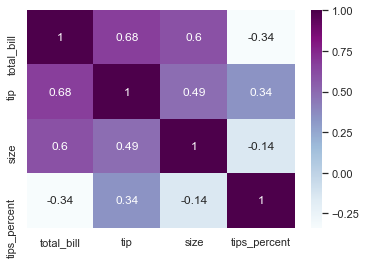

In [64]:
# everythin ok, but remove tips_percent value
corr = df.corr()
sns.heatmap(corr, cmap="BuPu", annot=True)

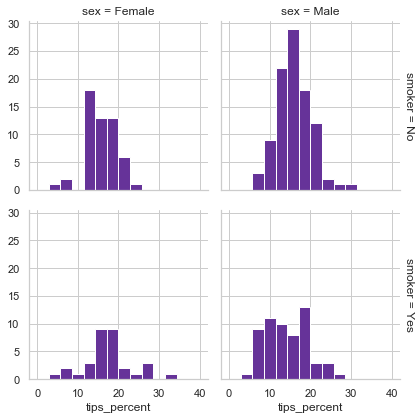

In [65]:
df['tips_percent'] = 100 *(df['tip'] / df['total_bill'])
grid = sns.FacetGrid(df, row = "smoker", col = "sex", margin_titles=True)
grid.map(plt.hist, "tips_percent", bins=np.linspace(0, 40, 15), color="rebeccapurple")

<font color='red'>From the histogram above we can see that the percentage of the most of tips varies between 10% and 20%, however it's interesting that the female smokers and male non-smokers seems to leave higher percentage (above 30% of total bill). </font>

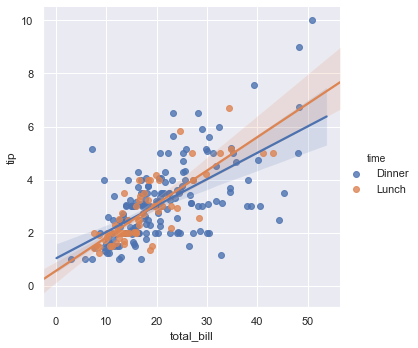

In [47]:
sns.lmplot(x="total_bill", y="tip", hue = "time", data=df)

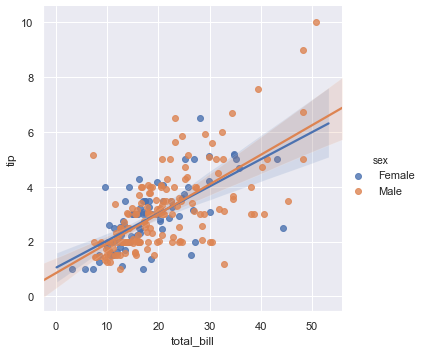

In [13]:
sns.lmplot(x="total_bill", y="tip", hue = "sex", data=df)

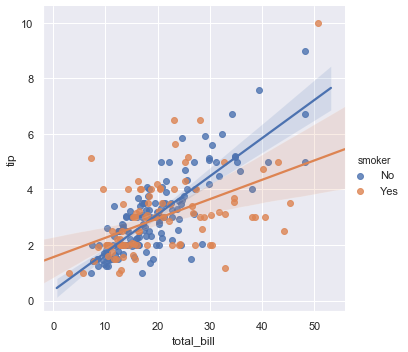

In [14]:
sns.lmplot(x="total_bill", y="tip", hue = "smoker", data=df)

<a id="ref"></a>

### __6. References__

 [14.&emsp; open SAP course: Introduction to Statistics for Data Science](https://open.sap.com/courses/ds0/items/3G1VitcwwJTo4w6gfQSEzt/quiz_submission/3YIkL40PUyicYRkurTOEVc?highest_score=true) <br>

 [18.&emsp; Markdown in Jupyter Notebook](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook) <br>
 [19.&emsp; Markdown for Jupyter notebooks cheatsheet](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) <br>
 [20.&emsp; Markdown Cells](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) <br>
 [21.&emsp; How to write LaTeX in IPython Notebook?](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) <br>
 
 
 https://www3.nd.edu/~rwilliam/stats2/l25.pdf
 https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab


# testing starts here

In [10]:
Q1t = df['tip'].quantile(0.25)
Q3t = df['tip'].quantile(0.75)
IQRt = Q3t - Q1t

Outliert = (df['tip'] < (Q1t - 1.5 * IQRt))|(df['tip']> (Q3t + 1.5 * IQRt))
[y for y, z in enumerate(Outliert) if z]

[23, 47, 59, 141, 170, 183, 212, 214, 239]

In [11]:
print(df['tip'][[23, 47, 59, 141, 170, 183, 212, 214, 239]])

print(IQRt)
print(Q1t)
print(Q3t)

23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
239     5.92
Name: tip, dtype: float64
1.5624999999999996
2.0
3.5624999999999996


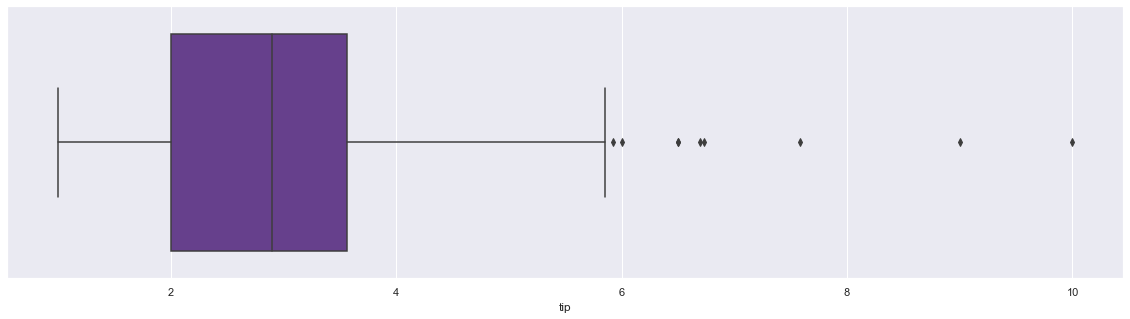

In [7]:
plt.figure(figsize=(20,5))

sns.boxplot(df['tip'], color="rebeccapurple")

In [13]:
df_new = pd.read_csv("tips_outliers_removed.csv")
print(df_new)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

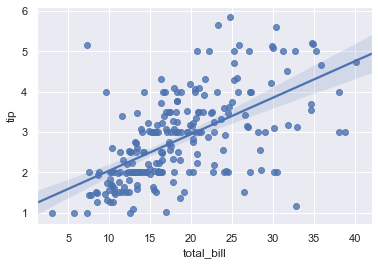

In [14]:
sns.regplot(x="total_bill", y="tip", data=df_new)

# finishes here

# checking with test

In [18]:
# Run regression:

reg = smf.ols('tip ~ total_bill + size', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           9.67e-34
Time:                        16:17:51   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
pred_val = reg.fittedvalues.copy()
true_val = df['tip'].values.copy()
residual = true_val - pred_val

In [ ]:
residual

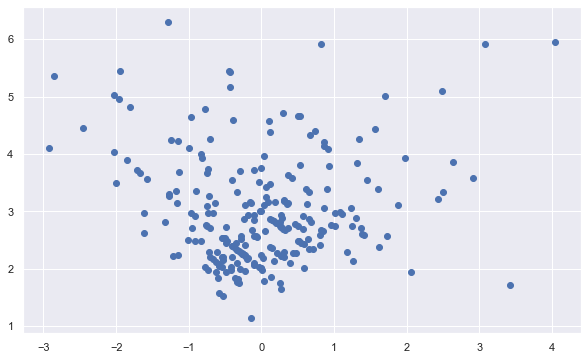

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
_ = ax.scatter(residual, pred_val)

In [26]:
sms.linear_harvey_collier(reg)

Ttest_1sampResult(statistic=-0.9712769345888475, pvalue=0.33238824391164823)

In [29]:
lm, lm_pvalue, fvalue, f_pvalue = smd.het_breuschpagan(residual, df[['total_bill', 'tip']])
lm, lm_pvalue, fvalue, f_pvalue

(86.35545133253876,
 1.5033355772172123e-20,
 66.2820865013135,
 1.1091361708523451e-23)

# Testing  homescedasticy

In [10]:
results = smf.ols(formula='tip ~ total_bill', data=df).fit()
tip_pred = results.predict(df[["total_bill"]])
residual2 = df["tip"].values-tip_pred

In [11]:
residual2

0     -1.694636
1     -0.346223
2      0.373165
3     -0.097250
4      0.107178
5      1.133660
6      0.158665
7     -0.623329
8     -0.539838
9      0.757468
10    -0.288871
11     0.376566
12    -0.969748
13     0.144129
14     0.542217
15     0.733301
16    -0.335173
17     1.078881
18     0.797464
19     0.260974
20     1.277691
21    -0.301217
22    -0.346506
23     2.519664
24     0.178144
25    -0.450756
26    -0.324447
27    -0.253031
28     1.100698
29     0.015999
         ...   
214    2.621190
215   -1.175086
216   -0.876710
217   -0.637504
218   -0.293159
219   -0.995709
220    0.002632
221    1.150301
222    0.098620
223    0.401439
224   -0.749699
225   -0.129019
226    0.020033
227   -0.068021
228    0.405005
229   -0.363412
230   -1.441908
231    0.431896
232    1.250396
233   -0.581384
234    0.448700
235   -0.727867
236   -1.243579
237   -3.198225
238   -0.013298
239    1.950869
240   -1.774836
241   -1.301175
242   -1.041807
243    0.107370
Length: 244, dtype: floa

In [15]:
reg = smf.ols('tip ~ total_bill', data=df).fit()
pred_val = reg.fittedvalues.copy()
true_val = df['tip'].values.copy()
residual = true_val - pred_val

In [16]:
residual

0     -1.694636
1     -0.346223
2      0.373165
3     -0.097250
4      0.107178
5      1.133660
6      0.158665
7     -0.623329
8     -0.539838
9      0.757468
10    -0.288871
11     0.376566
12    -0.969748
13     0.144129
14     0.542217
15     0.733301
16    -0.335173
17     1.078881
18     0.797464
19     0.260974
20     1.277691
21    -0.301217
22    -0.346506
23     2.519664
24     0.178144
25    -0.450756
26    -0.324447
27    -0.253031
28     1.100698
29     0.015999
         ...   
214    2.621190
215   -1.175086
216   -0.876710
217   -0.637504
218   -0.293159
219   -0.995709
220    0.002632
221    1.150301
222    0.098620
223    0.401439
224   -0.749699
225   -0.129019
226    0.020033
227   -0.068021
228    0.405005
229   -0.363412
230   -1.441908
231    0.431896
232    1.250396
233   -0.581384
234    0.448700
235   -0.727867
236   -1.243579
237   -3.198225
238   -0.013298
239    1.950869
240   -1.774836
241   -1.301175
242   -1.041807
243    0.107370
Length: 244, dtype: floa

Other way to plot residuals:

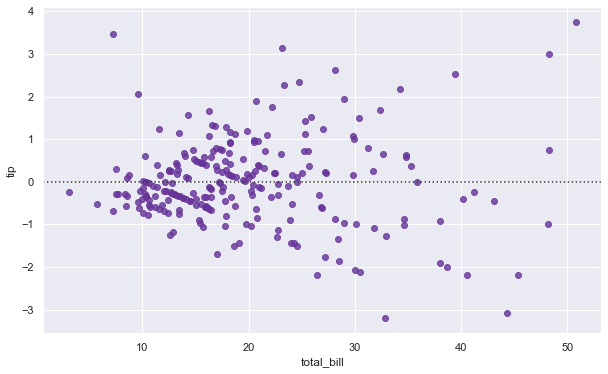

In [17]:
fig = plt.figure(figsize=(10,6))
sns.residplot(df['total_bill'], df['tip'], color="rebeccapurple")

Checking homoscedasticity if the outliers are removed:

In [37]:
df_new = pd.read_csv("tips_outliers_removed.csv")

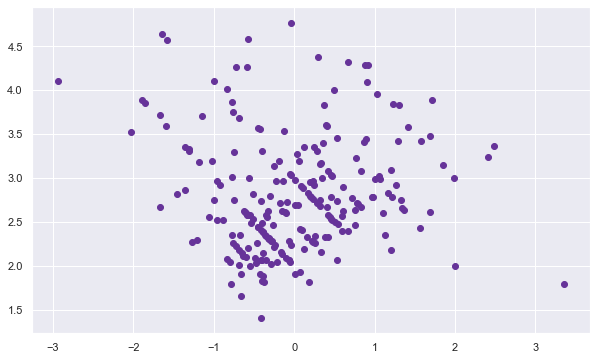

In [42]:
# Run regression:
reg = smf.ols('tip ~ total_bill', data=df_new).fit()

# Calculating residuals:
pred_val = reg.fittedvalues.copy()
true_val = df_new['tip'].values.copy()
residual = true_val - pred_val

# Plotting Residual vs Predicted value
fig = plt.figure(figsize=(10,6))
plt.scatter(residual, pred_val, color="rebeccapurple")

In [43]:
name = ['LM statistic', 'LM-Test p-value', 'F-statistics', 'F-test p-value']
test = smd.het_breuschpagan(residual, df_new[['total_bill', 'tip']])
lzip(name, test)

[('LM statistic', 70.13184038029004),
 ('LM-Test p-value', 5.5470346745631234e-17),
 ('F-statistics', 50.10421158158469),
 ('F-test p-value', 9.470150533084958e-19)]

# testing hetero csv file

In [7]:
df_het = pd.read_csv("hetero.csv")
df_het

,Accidents,AccidentRate,Population,Weight
0,20,0.000135,147603.98900,0.000007
1,38,0.000062,611903.15790,0.000002
2,17,0.000120,141304.46200,0.000007
3,16,0.000078,204849.50370,0.000005
4,20,0.000131,152426.47570,0.000007
5,37,0.000088,421404.95840,0.000002
6,18,0.000090,200044.22900,0.000005
7,43,0.000113,381182.06150,0.000003
8,46,0.000082,560294.83600,0.000002
9,63,0.000078,803916.23570,0.000001


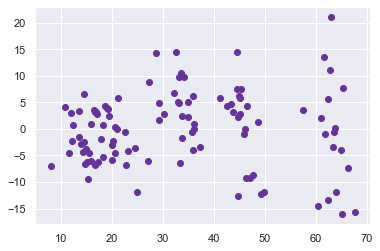

In [31]:
# Run regression:
reg = smf.ols('Accidents ~ Population', data=df_het).fit()

# Calculating residuals:
pred_val = reg.fittedvalues.copy()
true_val = df_het['Accidents'].values.copy()
residual = true_val - pred_val


#sns.distplot(df_het.residual, color="rebeccapurple")
#sns.distplot(df['total_bill'], color="rebeccapurple")

# Plotting Residual vs Predicted value
#plt.xticks(np.arange(0.00007, 0.00011, 0.00001))
plt.scatter(pred_val, residual, color="rebeccapurple")

# testing hetero with tips_mod2.csv file (3 outliers removed as per tips_mod csv file

In [2]:
df_mod2 = pd.read_csv("tips_mod2.csv")
#df_mod2

Other way to plot residuals:

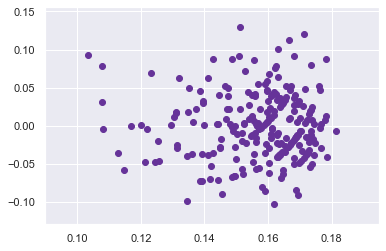

In [3]:
# Run regression:
reg = smf.ols('tips_range ~ total_bill', data=df_mod2).fit()

# Calculating residuals:
pred_val = reg.fittedvalues.copy()
true_val = df_mod2['tips_range'].values.copy()
residual = true_val - pred_val


#sns.distplot(df_het.residual, color="rebeccapurple")
#sns.distplot(df['total_bill'], color="rebeccapurple")

# Plotting Residual vs Predicted value
#plt.xticks(np.arange(0.00007, 0.00011, 0.00001))
plt.scatter(pred_val, residual, color="rebeccapurple")

Looking for outliers:

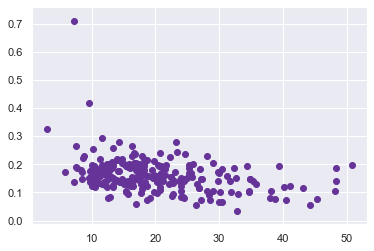

In [47]:
plt.scatter(df_mod['total_bill'], df_mod['tips_range'], color="rebeccapurple")

In [44]:
name = ['LM statistic', 'LM-Test p-value', 'F-statistics', 'F-test p-value']
test = smd.het_breuschpagan(residual, df_mod2[['total_bill', 'tips_range']])
lzip(name, test)

[('LM statistic', 88.37599581739991),
 ('LM-Test p-value', 5.412362772387301e-21),
 ('F-statistics', 69.19574385916478),
 ('F-test p-value', 1.9583629853731693e-24)]

Text(0, 0.5, 'Tips')

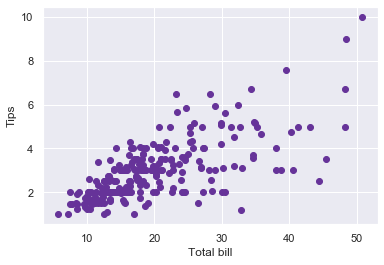

In [6]:
plt.scatter(df_mod2['total_bill'], df_mod2['tip'], color="rebeccapurple")
plt.xlabel("Total bill")
plt.ylabel("Tips")

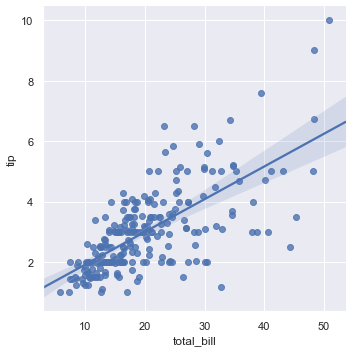

In [10]:
sns.lmplot(x="total_bill", y="tip", data=df_mod2)